# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

 ### Reminder: Predictions and modeling should be in separate notebooks!

## Step 1: Read in Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats
import math
from sklearn import linear_model

pd.set_option('display.max_columns', 100, 'display.max_rows', 500)

In [4]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [5]:
df = pd.read_csv("kc_house_data_train.csv")
print(df.shape)
df.head()

(17290, 22)


Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  2591820310  20141006T000000   365000.0         4       2.25   
1           1  7974200820  20140821T000000   865000.0         5       3.00   
2           2  7701450110  20140815T000000  1038000.0         4       2.50   
3           3  9522300010  20150331T000000  1490000.0         3       3.50   
4           4  9510861140  20140714T000000   711000.0         3       2.50   

   sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0         2070      8893     2.0           0     0          4      8   
1         2900      6730     1.0           0     0          5      8   
2         3770     10893     2.0           0     2          3     11   
3         4560     14608     2.0           0     2          3     12   
4         2550      5376     2.0           0     0          3      9   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        2070              0      1986             0    98058  47.4388   
1        1830           1070      1977             0    98115  47.6784   
2        3770              0      1997             0    98006  47.5646   
3        4560              0      1990             0    98034  47.6995   
4        2550              0      2004             0    98052  47.6647   

      long  sqft_living15  sqft_lot15  
0 -122.162           2390        7700  
1 -122.285           2370        6283  
2 -122.129           3710        9685  
3 -122.228           4050       14226  
4 -122.083           2250        4050

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [7]:
df.describe()

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  17290.000000  1.729000e+04  1.729000e+04  17290.000000  17290.000000   
mean    8644.500000  4.565502e+09  5.407395e+05      3.372470      2.111943   
std     4991.337413  2.874656e+09  3.733190e+05      0.939346      0.770476   
min        0.000000  1.000102e+06  7.500000e+04      0.000000      0.000000   
25%     4322.250000  2.114701e+09  3.210000e+05      3.000000      1.500000   
50%     8644.500000  3.903650e+09  4.500000e+05      3.000000      2.250000   
75%    12966.750000  7.301150e+09  6.450000e+05      4.000000      2.500000   
max    17289.000000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000   
mean    2081.464604  1.524340e+04      1.490312      0.007981      0.238519   
std      920.018539  4.230462e+04      0.538909      0.088985      0.775229   
min      290.000000  5.720000e+02      1.000000      0.000000      0.000000   
25%     1430.000000  5.081250e+03      1.000000      0.000000      0.000000   
50%     1920.000000  7.642000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.072575e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000   
mean       3.408502      7.654425   1789.306015     292.158589   1970.792019   
std        0.651296      1.174718    829.265107     443.151874     29.343516   
min        1.000000      1.000000    290.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1200.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1560.000000       0.000000   1974.000000   
75%        4.000000      8.000000   2214.500000     560.000000   1996.000000   
max        5.000000     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   
mean      83.806304  98078.193175     47.560058   -122.214258    1987.986698   
std      400.329376     53.607949      0.138412      0.140857     684.802635   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471200   -122.329000    1490.000000   
50%        0.000000  98065.000000     47.571600   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.677900   -122.126000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   17290.000000  
mean    12873.475824  
std     27227.437583  
min       659.000000  
25%      5111.250000  
50%      7622.500000  
75%     10101.750000  
max    858132.000000

In [8]:
print(df['bedrooms'].quantile(.999))
print(df['bedrooms'].quantile(.001))

8.0
1.0


In [9]:
df[df['bedrooms'] > 8]

Unnamed: 0          id             date      price  bedrooms  \
2356         2356  1773100755  20140821T000000   520000.0        11   
3425         3425   424049043  20140811T000000   450000.0         9   
3680         3680  8812401450  20141229T000000   660000.0        10   
8207         8207  8823900290  20150317T000000  1400000.0         9   
8446         8446  8823901445  20150313T000000   934000.0         9   
8597         8597  2402100895  20140625T000000   640000.0        33   
8624         8624  1997200215  20140507T000000   599999.0         9   
11181       11181   627300145  20140814T000000  1148000.0        10   
14156       14156  2902200015  20150106T000000   700000.0         9   
17114       17114  5566100170  20141029T000000   650000.0        10   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
2356        3.00         3000      4960     2.0           0     0          3   
3425        7.50         4050      6504     2.0           0     0          3   
3680        3.00         2920      3745     2.0           0     0          4   
8207        4.00         4620      5508     2.5           0     0          3   
8446        3.00         2820      4480     2.0           0     0          3   
8597        1.75         1620      6000     1.0           0     0          5   
8624        4.50         3830      6988     2.5           0     0          3   
11181       5.25         4590     10920     1.0           0     2          3   
14156       3.00         3680      4400     2.0           0     0          3   
17114       2.00         3610     11914     2.0           0     0          4   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
2356       7        2400            600      1918          1999    98106   
3425       7        4050              0      1996             0    98144   
3680       7        1860           1060      1913             0    98105   
8207      11        3870            750      1915             0    98105   
8446       7        1880            940      1918             0    98105   
8597       7        1040            580      1947             0    98103   
8624       7        2450           1380      1938             0    98103   
11181      9        2500           2090      2008             0    98004   
14156      7        2830            850      1908             0    98102   
17114      7        3010            600      1958             0    98006   

           lat     long  sqft_living15  sqft_lot15  
2356   47.5560 -122.363           1420        4960  
3425   47.5923 -122.301           1448        3866  
3680   47.6635 -122.320           1810        3745  
8207   47.6684 -122.309           2710        4320  
8446   47.6654 -122.307           2460        4400  
8597   47.6878 -122.331           1330        4700  
8624   47.6927 -122.338           1460        6291  
11181  47.5861 -122.113           2730       10400  
14156  47.6374 -122.324           1960        2450  
17114  47.5705 -122.175           2040       11914

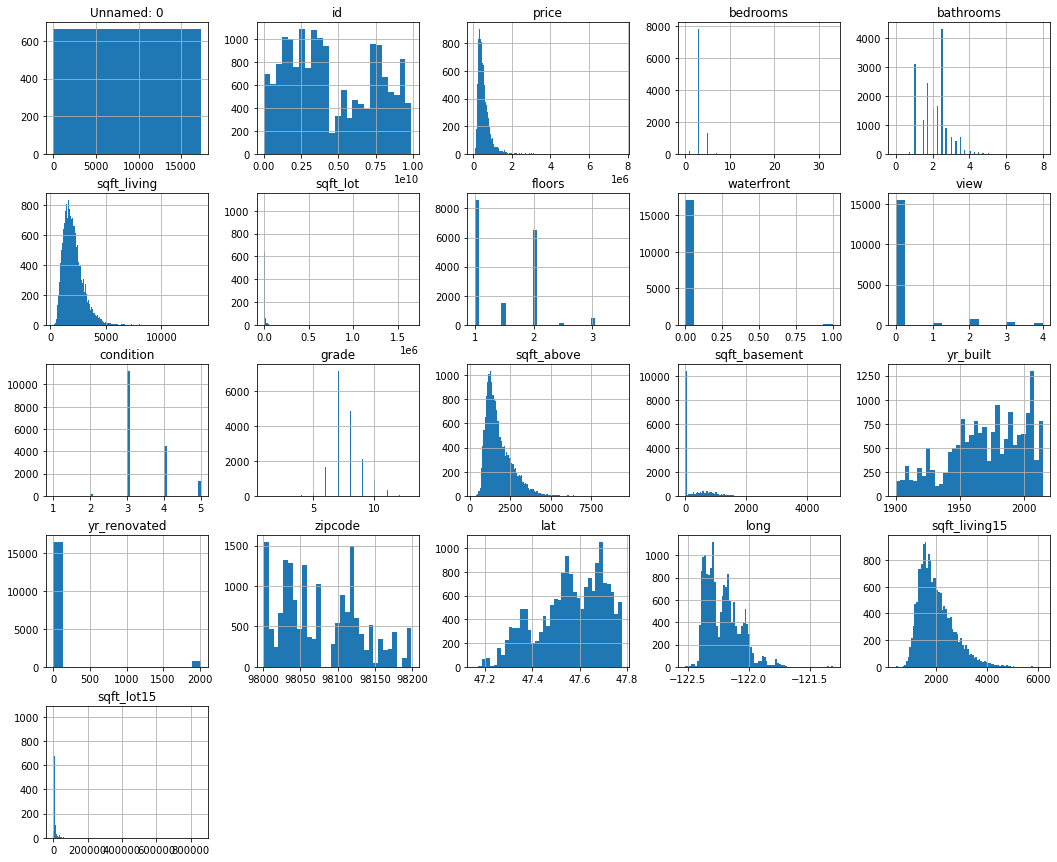

In [10]:
df.hist(figsize=(18,15), bins='auto');

<AxesSubplot:xlabel='grade'>

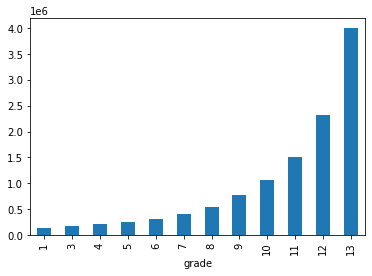

In [11]:
df.groupby('grade')['price'].mean().plot(kind='bar')

In [12]:
df[['lat','long','price']]

lat     long      price
0      47.4388 -122.162   365000.0
1      47.6784 -122.285   865000.0
2      47.5646 -122.129  1038000.0
3      47.6995 -122.228  1490000.0
4      47.6647 -122.083   711000.0
...        ...      ...        ...
17285  47.5858 -122.112   750000.0
17286  47.6687 -122.288   440000.0
17287  47.7635 -122.262   310000.0
17288  47.4199 -121.990   427500.0
17289  47.7366 -122.319   348000.0

[17290 rows x 3 columns]

In [13]:
df['lat_long'] = list(zip(df['lat'],df['long']))
df.head()

Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  2591820310  20141006T000000   365000.0         4       2.25   
1           1  7974200820  20140821T000000   865000.0         5       3.00   
2           2  7701450110  20140815T000000  1038000.0         4       2.50   
3           3  9522300010  20150331T000000  1490000.0         3       3.50   
4           4  9510861140  20140714T000000   711000.0         3       2.50   

   sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0         2070      8893     2.0           0     0          4      8   
1         2900      6730     1.0           0     0          5      8   
2         3770     10893     2.0           0     2          3     11   
3         4560     14608     2.0           0     2          3     12   
4         2550      5376     2.0           0     0          3      9   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        2070              0      1986             0    98058  47.4388   
1        1830           1070      1977             0    98115  47.6784   
2        3770              0      1997             0    98006  47.5646   
3        4560              0      1990             0    98034  47.6995   
4        2550              0      2004             0    98052  47.6647   

      long  sqft_living15  sqft_lot15             lat_long  
0 -122.162           2390        7700  (47.4388, -122.162)  
1 -122.285           2370        6283  (47.6784, -122.285)  
2 -122.129           3710        9685  (47.5646, -122.129)  
3 -122.228           4050       14226  (47.6995, -122.228)  
4 -122.083           2250        4050  (47.6647, -122.083)

In [14]:
df[['lat_long','price']].describe()

price
count  1.729000e+04
mean   5.407395e+05
std    3.733190e+05
min    7.500000e+04
25%    3.210000e+05
50%    4.500000e+05
75%    6.450000e+05
max    7.700000e+06

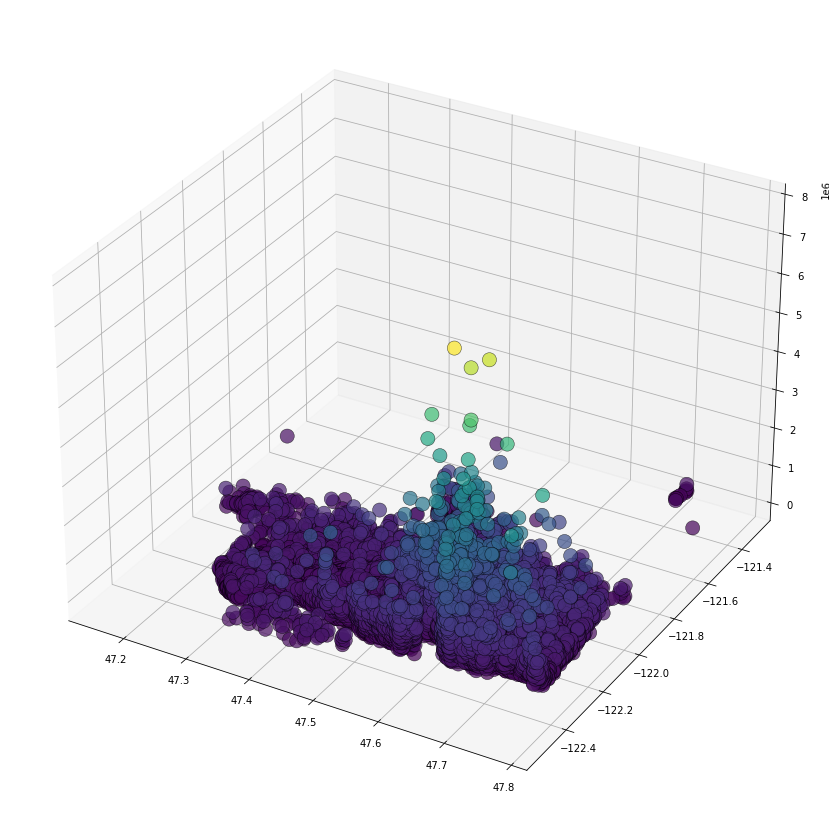

In [15]:
from mpl_toolkits.mplot3d import Axes3D

x = df['lat']
y = df['long']
z = df['price']
 

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=.5, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

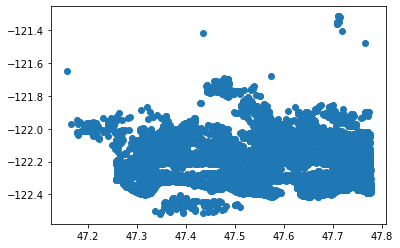

In [16]:
plt.scatter(df.lat, df.long)
plt.show()

In [18]:
# from shapely.geometry import Point, Polygon
# import geopandas as gpd
# from geopandas import GeoDataFrame
# import descartes
# crs = {'init': 'epsg:4326'}

# geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# # gdf = GeoDataFrame(df, geometry=geometry)   

# geo_df = gpd.GeoDataFrame(df,
#                           crs=crs,
#                           geometry= geometry)

# #this is a simple map that goes with geopandas
# street_map = gpd.read_file('/Users/sandrawelbeck/Desktop/Flatiron_DS_Bootcamp/nyc-mhtn-ds-102620-lectures/Phase_2/Phase2_project/tl_2017_53033_roads/tl_2017_53033_roads.shp')
# fig, ax = plt.subplots(figsize = (15,15))

# geo_df.plot(ax=ax, markersize=20, color='red', marker = 'o', label = "Long,Lat")
# street_map.plot(ax=ax, alpha = 0.4, color="grey")
# # geo_df[geo_df['WnvPresent']==1].plot(ax=ax, markersize=20, color=red, marker = '^', label = "Pos")
# plt.legend(prop={'size':15})

# # world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# # gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
leave_out = ['id','date','month','year','price','geometry']
for_plot = [x for x in df.columns if x not in leave_out]

In [18]:
for_plot

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'lat_long']

IndexError: index 6 is out of bounds for axis 0 with size 6

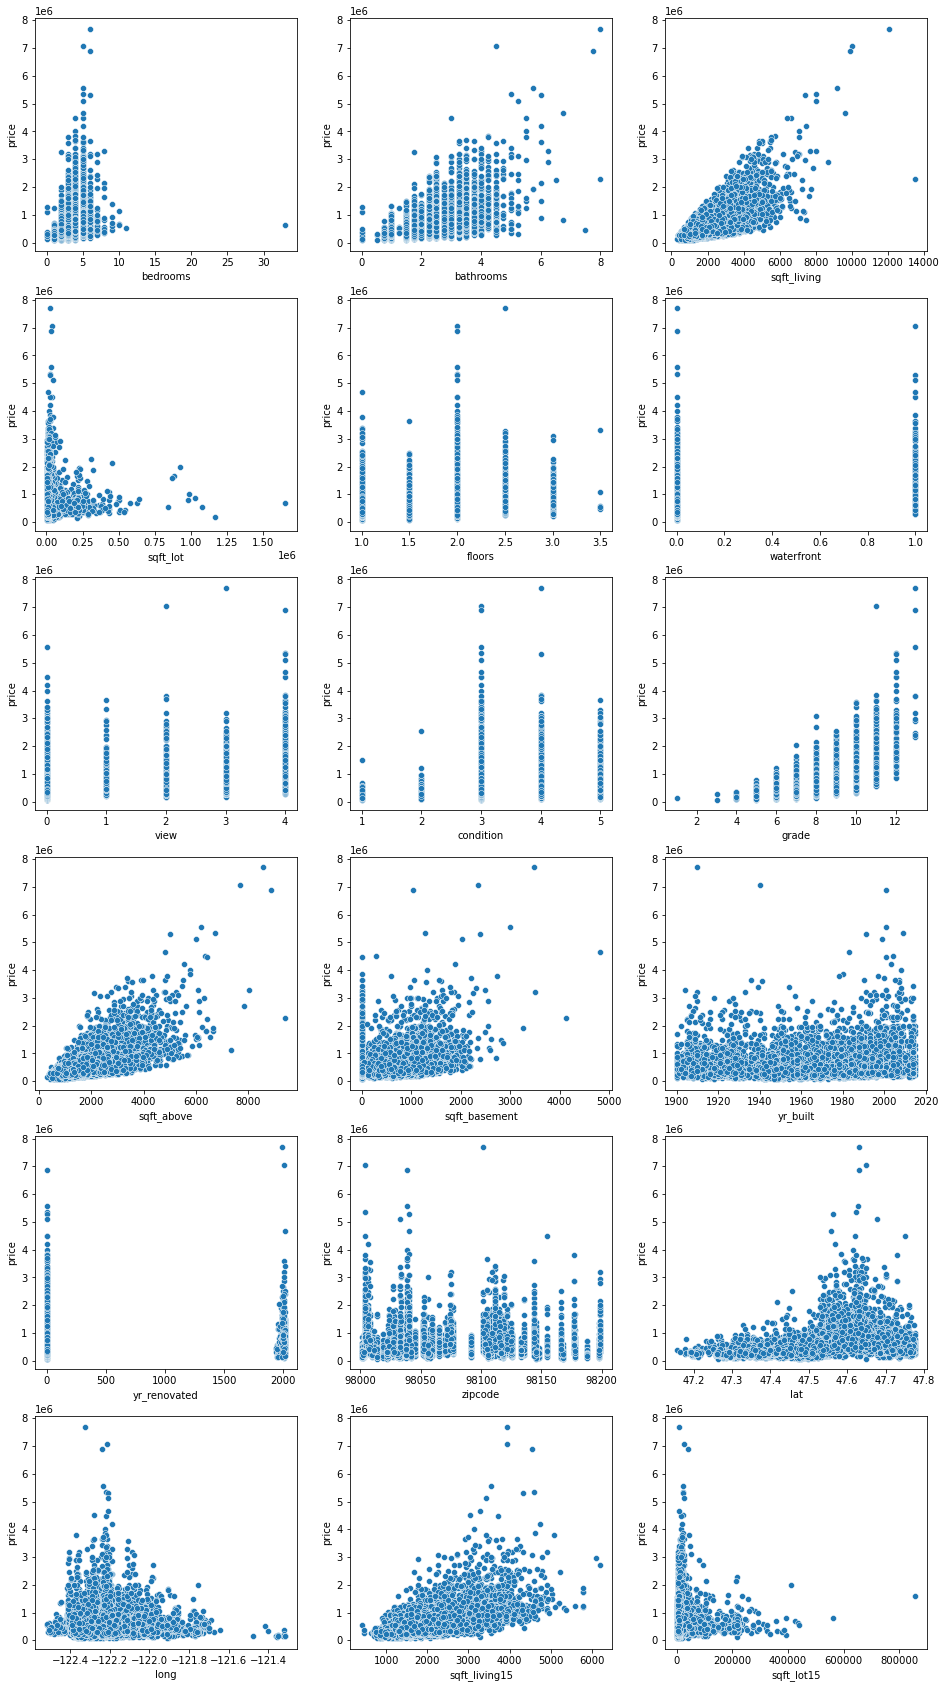

In [19]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,30))

for i, column in enumerate(for_plot):
    sns.scatterplot(data=df, x=column, y='price', ax=axes[i//3, i%3])

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [ ]:
#Replace 33 bedrooms with 3 as it was a typo
df['bedrooms'] = df['bedrooms'].replace({33:3})

In [ ]:
#Change "0" values in yr_renovated column to an actual year(yr_built)
df['yr_renovated'] = np.where(df['yr_renovated']==0, df['yr_built'], df['yr_renovated'])

In [ ]:
#Change date column to datetime type and create two additional columns for month and year sold
df['date'] = pd.to_datetime(df['date']) #turn date column to date type
df['month'] = pd.DatetimeIndex(df.loc[:,'date']).month #Create month column
df['year'] = pd.DatetimeIndex(df.loc[:,'date']).year #create year column

In [ ]:

df.groupby('year')['month'].value_counts()

In [ ]:
#keep
# df['bathrooms'] = df['bathrooms'].replace(0,df['bathrooms'].median())
# df['bedrooms'] = df['bedrooms'].replace(0,df['bedrooms'].median())
df[df['bathrooms'] ==0]

In [ ]:
df.describe()

In [ ]:
df[['yr_built','yr_renovated']]

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [ ]:
df['yr_since_reno'] = 2020 - df['yr_renovated']

In [ ]:
df['yrs_since_built'] = 2020 - df['yr_built']

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here
# pd.get_dummies(df['rating']).head(10)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
#your code here 
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_since_reno', 'yrs_since_built']

In [ ]:
df_features = df[features]

target = df['price']

In [ ]:
df_features.isnull().sum()

In [ ]:
#import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=30,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

### 5.2) Fit your scaler to training the data.

In [ ]:
#your code here 

In [ ]:
scaler = StandardScaler()

#fit the scaler and transform the training data
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=df_features.columns)

### 5.3) Transform the testing set with the scaler.

In [ ]:
#your code here 
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

### 5.4) Fit the model to the training data.

In [ ]:
#your code here 

In [ ]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

### 5.5) Use the model to predict on the training set and the test set.

In [ ]:
#your code here 

In [ ]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [ ]:
#your code here 
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print ("R^2 Score:", lm.score(X_train, y_train))

In [ ]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

In [ ]:
#take the natural log of the target variable
y_log = np.log(y_train)

#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)

#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)


train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [ ]:
# your code here

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

In [ ]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

In [ ]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

In [ ]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, target, random_state=9,test_size=0.2)
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [ ]:
# instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(X_train, y_train)

y_train_pred = lm_3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [ ]:
# use fitted model to predict on test data
y_pred = lm_3.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [ ]:
# your code here


## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/